In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

In [4]:
spotify = pd.read_csv('spotifytop10s.csv',
                     encoding='ISO-8859-1')
spotify.head(1)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83


In [5]:
sp = spotify.drop_duplicates(subset = 'title')
#make title index
spt = sp.set_index('title')
spt = spt.drop(columns = ['Unnamed: 0'])
#5 most popular songs
spt.sort_values(by = 'pop', ascending = False).iloc[:5]['artist']

title
Memories                    Maroon 5
Lose You To Love Me     Selena Gomez
Someone You Loved      Lewis Capaldi
Señorita                Shawn Mendes
How Do You Sleep?          Sam Smith
Name: artist, dtype: object

Exploratory Analysis

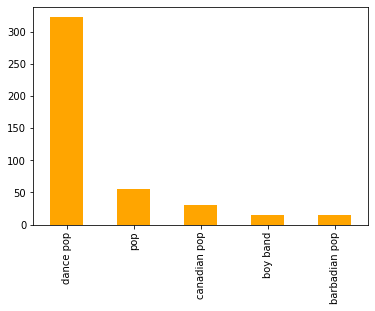

In [6]:
sp['top genre'].value_counts()[:5].plot(kind = 'bar', color = 'orange')

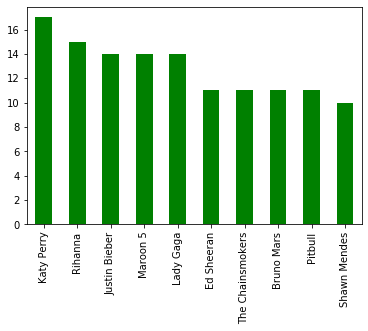

In [7]:
sp['artist'].value_counts()[:10].plot(kind = 'bar', color = 'green')

In [9]:
#masks by year    
mask10 = sp['year'] == 2010 
mask11 = sp['year'] == 2011
mask12 = sp['year'] == 2012
mask13 = sp['year'] == 2013
mask14 = sp['year'] == 2014
mask15 = sp['year'] == 2015
mask16 = sp['year'] == 2016
mask17 = sp['year'] == 2017
mask18 = sp['year'] == 2018
mask19 = sp['year'] == 2019


#spotify by year
spot10 = sp[mask10]
spot11 = sp[mask11]
spot12 = sp[mask12]
spot13 = sp[mask13]
spot14 = sp[mask14]
spot15 = sp[mask15]
spot16 = sp[mask16]
spot17 = sp[mask17]
spot18 = sp[mask18]
spot19 = sp[mask19]


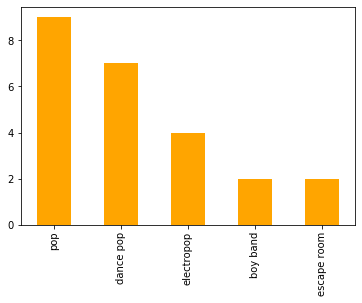

In [10]:
spot19['top genre'].value_counts()[:5].plot(kind = 'bar', color = 'orange')

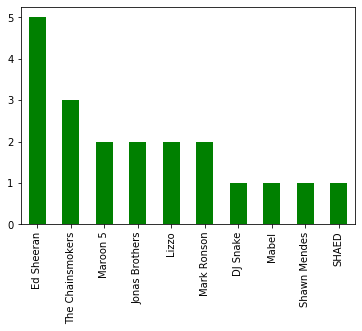

In [11]:
spot19['artist'].value_counts()[:10].plot(kind = 'bar', color = 'green')

In [12]:
def get_pop(s):
    if 'pop' in s:
        return True
    else: 
        return False
pop_mask = sp['top genre'].map(get_pop)
pop_spotify = sp[pop_mask]

In [13]:
len(pop_spotify) / len(spotify)

0.7844112769485904

Solutions

Linear Regression on Whole Dataset

In [14]:
#y, X = dmatrices('pop ~ year + dnce + nrgy + bpm + dB + live + val + dur + acous + spch', data=sp, return_type='dataframe')
#not significant -> bpm, val, acous, spch, live

In [15]:
y, X = dmatrices('pop ~ dnce + nrgy + dB + dur', data=sp, return_type='dataframe')
#dnce and dB are most positively significant, nrgy and duration most negatively significant, live not significant

In [16]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     10.86
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           1.69e-08
Time:                        17:08:55   Log-Likelihood:                -2374.2
No. Observations:                 584   AIC:                             4758.
Df Residuals:                     579   BIC:                             4780.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.5538      6.817     13.283      0.0

Linear Regression on Pop

In [17]:
#y, X = dmatrices('pop ~ dnce + nrgy + bpm + dB + live + val + dur + acous + spch', data=pop_spotify, return_type='dataframe')
#not significant -> dnce, bpm, val, acous, spch

In [18]:
y, X = dmatrices('pop ~ nrgy + dB + live + dur', data=pop_spotify, return_type='dataframe')

In [19]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.629
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           0.000197
Time:                        17:08:56   Log-Likelihood:                -1909.3
No. Observations:                 473   AIC:                             3829.
Df Residuals:                     468   BIC:                             3849.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.7582      7.472     12.949      0.0

Linear Regression on 2019 Songs 

In [20]:
#y, X = dmatrices('pop ~ dnce + nrgy + bpm + dB + live + val + dur + acous + spch', data=spot19, return_type='dataframe')
#not significant -> dnce, bpm, val, acous, spch

In [21]:
y, X = dmatrices('pop ~ nrgy + dB + bpm', data=spot19, return_type='dataframe')

In [22]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())
print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     7.517
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           0.000823
Time:                        17:08:56   Log-Likelihood:                -99.645
No. Observations:                  31   AIC:                             207.3
Df Residuals:                      27   BIC:                             213.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.3179     13.480     10.780      0.0

Logistic Regression on Whole dataset

Text(0, 0.5, 'Songs')

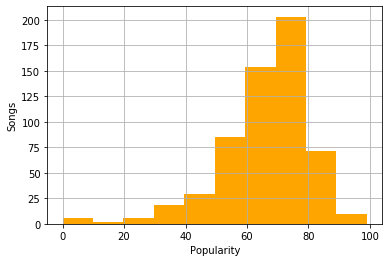

In [51]:
spot_hist = sp['pop'].hist(bins=10, color = 'orange')
spot_hist.set_xlabel("Popularity")
spot_hist.set_ylabel("Songs")

In [24]:
print(sp['pop'].median())

69.0


In [25]:
sp['target'] = 0.0
sp['target'][sp['pop'] > 69] = 1.0 
sp['target'].value_counts()

C:\Users\16107\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\16107\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\16107\anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

0.0    300
1.0    284
Name: target, dtype: int64

In [26]:
log_formula = 'target ~ 0 + year + bpm + nrgy + dnce + dB + live + val + dur + acous + spch'

In [27]:
Y, X = dmatrices(log_formula, sp, return_type='dataframe')
y = Y['target'].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\16107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.5686274509803921


In [31]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.5397727272727273


In [32]:
# y_train is 0 or 1.
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

Number of positive examples = 188
Number of negative examples = 220


In [33]:
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Number of examples where baseline is correct = 80
Baseline accuracy = 0.45454545454545453


In [34]:
weights = Series(model.coef_[0],
                index=X.columns.values)
weights.sort_values()

nrgy    -0.020507
live    -0.007350
dur     -0.006248
acous   -0.004353
val      0.000466
year     0.001138
bpm      0.001622
dnce     0.008982
spch     0.018994
dB       0.065431
dtype: float64

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=1)

In [36]:
sp['dur'].median()

220.0

In [37]:
model.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [38]:
Y, X = dmatrices('target ~ 0 + year + dnce + nrgy + bpm + dB + live + val + dur + acous + spch', data=sp, return_type='dataframe')
y = Y['target'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)

In [63]:
result = model.fit(X_train, y_train)

In [64]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.5931372549019608


In [65]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.5795454545454546
